In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

In [39]:
train_df = pd.read_csv("../data/cleaned_train.csv")
X_train = train_df.drop("price_range", axis=1)
y_train = train_df["price_range"]

In [40]:
test_df = pd.read_csv("../data/cleaned_test.csv")
X_test = test_df.drop("price_range", axis=1)
y_test = test_df["price_range"]

In [41]:
#number of trees (n_estimators), more trees = better preditions, slower training 
#random_state = the seed for the random number generator used by the model
#Random Forest builds multiple decision trees and averages their predictions (for classification, it usually takes a majority vote)
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, y_train)
print("Test Accuracy:", model.score(X_test, y_test))

Test Accuracy: 0.9995


n_estimators=1, Test Accuracy=0.8480
n_estimators=2, Test Accuracy=0.8505
n_estimators=5, Test Accuracy=0.9780
n_estimators=10, Test Accuracy=0.9975
n_estimators=20, Test Accuracy=0.9995
n_estimators=50, Test Accuracy=1.0000
n_estimators=100, Test Accuracy=1.0000
n_estimators=200, Test Accuracy=1.0000


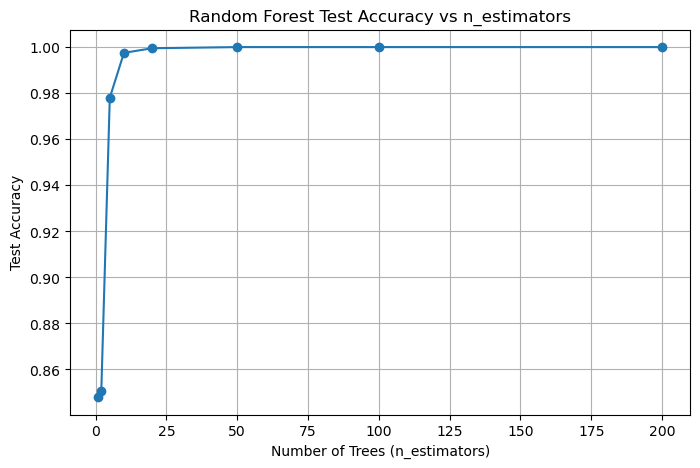

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

n_estimators_list = [1, 2, 5, 10, 20, 50, 100, 200]
test_accuracies = []

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_accuracies.append(acc)
    print(f"n_estimators={n}, Test Accuracy={acc:.4f}")

# --- Plot the results ---
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, test_accuracies, marker='o')
plt.title("Random Forest Test Accuracy vs n_estimators")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score

#5-fold cross-validation
#evaluate how well your model generalizes to unseen data
#Instead of using one fixed train/test split, it splits the training data into 5 folds
#model is trained on some folds and tested on the remaining fold
#each fold gets used as a test set exactly once
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [0.8825 0.8975 0.8975 0.8775 0.865 ]
Mean CV accuracy: 0.884


In [44]:
#an attribute of the trained model that stores the “importance” of each feature in predicting the target
#attributes that end with _ are created only after the model is fitted/trained
importances = model.feature_importances_
#column names except price_range
feature_names = X_train.columns
#sort second tuple item( key=lambda x: x[1 <- lambda is anonymous func taking x(tuple input) and returning the x[1]) 
#importances in descening order (reverse=True)
#sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(importance_df)

          feature  importance
13            ram    0.500466
0   battery_power    0.075591
12       px_width    0.056691
11      px_height    0.056059
8       mobile_wt    0.037362
6      int_memory    0.034246
16      talk_time    0.029469
10             pc    0.027154
15           sc_w    0.027047
14           sc_h    0.025881
2     clock_speed    0.025475
4              fc    0.023336
7           m_dep    0.022703
9         n_cores    0.021876
3        dual_sim    0.006407
18   touch_screen    0.006345
1            blue    0.006326
5          four_g    0.006181
19           wifi    0.006035
17        three_g    0.005351


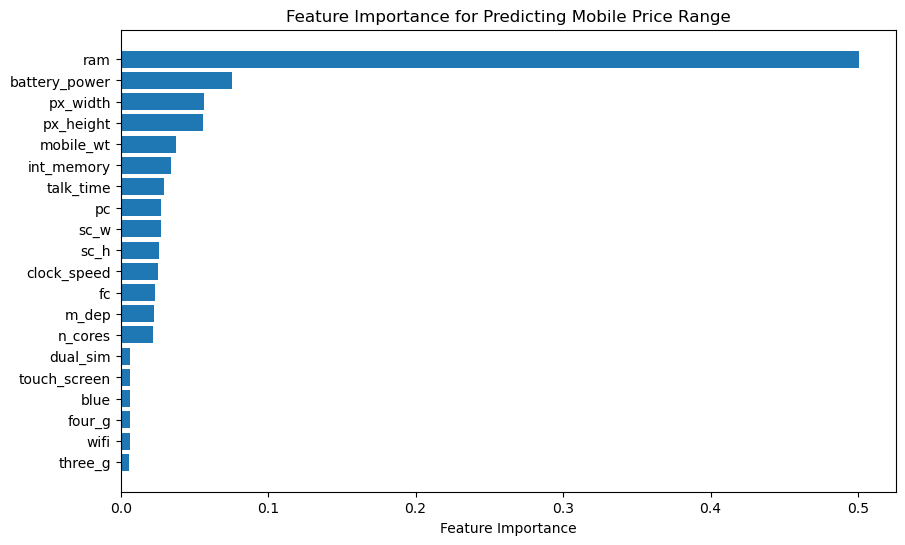

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Predicting Mobile Price Range")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

In [46]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_importances = pd.Series(result.importances_mean, index=X_test.columns).sort_values(ascending=False)

print(perm_importances)


ram              0.65835
battery_power    0.12105
px_width         0.03080
px_height        0.02990
mobile_wt        0.00060
int_memory       0.00020
n_cores          0.00010
sc_h             0.00005
touch_screen     0.00000
three_g          0.00000
talk_time        0.00000
sc_w             0.00000
pc               0.00000
blue             0.00000
m_dep            0.00000
four_g           0.00000
fc               0.00000
dual_sim         0.00000
clock_speed      0.00000
wifi             0.00000
dtype: float64


In [ ]:
import pickle

with open("../models/classifier.pkl", "wb") as f:
    pickle.dump(model, f)

In [50]:
import sys
sys.executable

'/Users/abigailjoseph/anaconda3/bin/python'

In [49]:
import sklearn
print("training sklearn version:", sklearn.__version__)


training sklearn version: 1.3.0
